# **Data analysis**

# **Environment Setup**

In [106]:
import numpy as np
import random as rm
import seaborn as sns
from tqdm import trange

from numba import njit

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

import math
import pandas as pd
from pathlib import Path

import os
from scipy.spatial import cKDTree
from scipy.signal import find_peaks
import plotly.express as px
import numpy as np

import kaleido
from pathlib import Path


In [111]:
plt.rcParams['figure.figsize'] = (5, 4)
plt.rcParams['figure.dpi'] = 100
sns.set_style("ticks")
sns.set_theme(
    style="white",
    context="poster",
    font_scale=2,
    rc={
        "font.family": "serif",
        "font.serif": ["Times New Roman", "DejaVu Serif"],
        "font.size": 14,
        "axes.labelsize": 14,
        "axes.titlesize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "legend.fontsize": 12,
        "mathtext.fontset": "cm",
        "xtick.bottom": True,
        "ytick.left": True,
        "axes.titleweight": "bold",
        "legend.frameon": False,
        "legend.framealpha": 1,
        "legend.facecolor": "white",
        "legend.edgecolor": "black",
        "lines.linewidth": 1.75,
        "axes.linewidth": 1.2,
        "grid.linewidth": 0.6,
        "grid.alpha": 0.8,
        "grid.linestyle": "--",
        "lines.markersize": 5,
    }
)
sns.set_palette("bright")

In [108]:
def get_simulation_parameters(filepath):
    params = {}
    keys = [
        "melting", "path", "N", "freeze_mc_steps", "alpha", "density", 
        "charge", "initial_temp", "final_temp", "temp_step"
    ]
    
    with open(filepath, 'r') as f:
        lines = f.readlines()
        for i, line in enumerate(lines):
            if i < len(keys):
                value = line.split('!')[0].strip()
                # Handle types properly
                if keys[i] == "melting" or keys[i] == "N":
                    params[keys[i]] = int(value)
                elif keys[i] == "path":
                    # Remove quotes if present
                    params[keys[i]] = value.strip('"').strip("'")
                else:
                    params[keys[i]] = float(value)
                
    return params



<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_31417/4142009272.py:14: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(gdr_file, sep='\s+', header=None, names=['r', 'gr',])


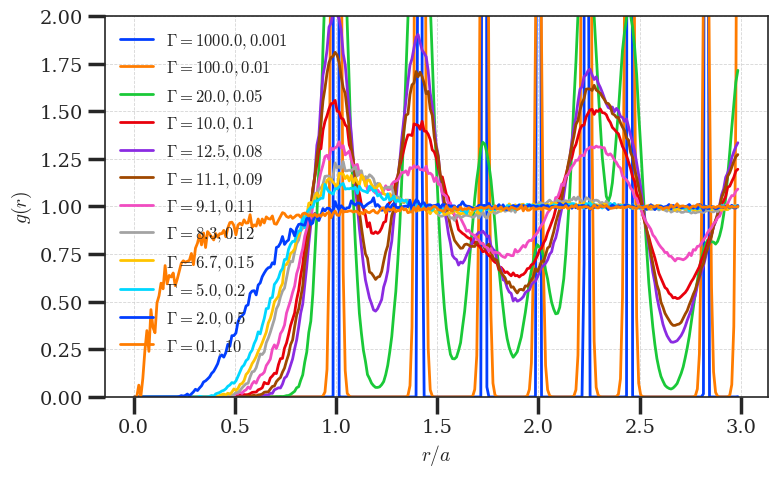

In [181]:
plt.figure(figsize=(8, 5))
gamma = lambda n, T : n**(1/3)/T
a_func = lambda rho : (1/rho)**(1/3)

T_list = [0.001, 0.01, 0.05, 0.1, 0.08, 0.09, 0.11, 0.12, 0.15, 0.2, 0.5, 10]
T_step_list = [0.0001]*(len(T_list)-1) + [0.1]

for T, T_step in zip(T_list,T_step_list):
    path = Path(f"output/n216_density1.00_t0.0001-{T}-{T_step}_melted")
    gdr_file = path / "rdf.out" 
    # parameters_file = path / "input_parameters.in"
    # params = get_simulation_parameters(parameters_file)

    df = pd.read_csv(gdr_file, sep='\s+', header=None, names=['r', 'gr',])

    plt.plot(df['r']/a_func(1.0), df['gr'], label=rf'$\Gamma = {gamma(1, T):.1f}, {T}$', linewidth=2)
    plt.xlabel(r'$r/a$')
    plt.ylabel(r'$g(r)$')
    plt.ylim(0, 2)
    plt.grid(True)
    plt.legend(loc='upper left',)
    plt.tight_layout()

plt.show()

# Tc 0.112


<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_31417/3885781365.py:27: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(gdr_file, sep='\s+', header=None, names=['r', 'gr'])


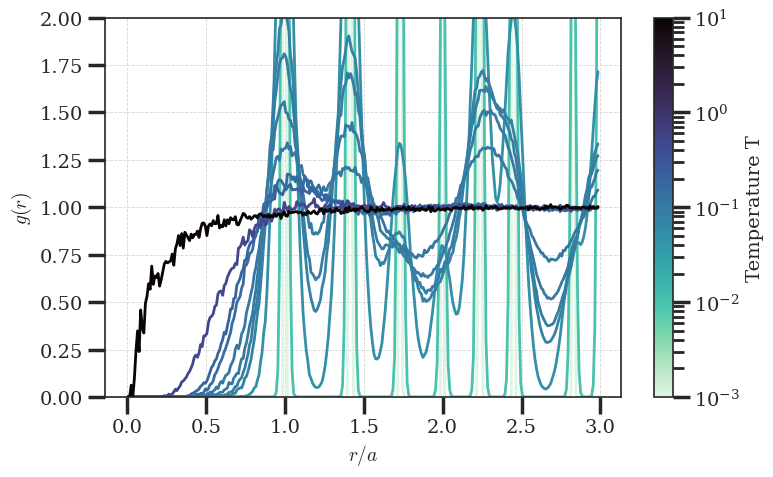

In [180]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from pathlib import Path

plt.figure(figsize=(8, 5))

gamma = lambda n, T: n**(1/3) / T
a_func = lambda rho: (1/rho)**(1/3)

T_list = [0.001, 0.01, 0.05, 0.1, 0.08, 0.09, 0.11, 0.15, 0.2, 0.5, 10]
T_step_list = [0.0001]*(len(T_list)-1) + [0.1]

# Sort by temperature for smooth color progression
T_sorted = sorted(T_list)

# Choose colormap
cmap = sns.color_palette("mako_r", as_cmap=True)

norm = mpl.colors.LogNorm(vmin=min(T_sorted), vmax=max(T_sorted))  # log scale is good here

for T, T_step in zip(T_list, T_step_list):
    path = Path(f"output/n216_density1.00_t0.0001-{T}-{T_step}_melted")
    gdr_file = path / "rdf.out"

    df = pd.read_csv(gdr_file, sep='\s+', header=None, names=['r', 'gr'])

    color = cmap(norm(T))

    plt.plot(
        df['r']/a_func(1.0),
        df['gr'],
        color=color,
        linewidth=2,
        label=rf'$T={T}$'
    )

plt.xlabel(r'$r/a$')
plt.ylabel(r'$g(r)$')
plt.ylim(0, 2)
plt.grid(True)

# Add colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Temperature T')

plt.tight_layout()
plt.show()
